<b>Melissa Laurino</b> - Mini Project #2

Data Visualization - March 14, 2017

<b>Importing data from Atlantic City Station Local Climatology Data provided by Professor Mick:</b>

In [3]:
import pandas as pd
import matplotlib.pylab as plt
pd.set_option("display.max_columns", 100)
%matplotlib inline
unclean_dataset = pd.read_csv("893206.csv")

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,17,18,20,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
for x in [7,17,18,20,22,24]:
    print(unclean_dataset.columns[x])

HOURLYSKYCONDITIONS
HOURLYWindSpeed
HOURLYWindDirection
HOURLYStationPressure
HOURLYPressureChange
HOURLYPrecip


In [5]:
def my_convert_function(val):
    if len(val) > 0:
        val = val.replace("s", "")
        try:
            return float(val)
        except:
            print("I could not convert the value: '", val, "'")
            
    return None

In [6]:
hourly_precip_dataset = pd.read_csv(
    "893206.csv", 
    usecols = ["DATE", "HOURLYPrecip"],
    converters = {
        "HOURLYPrecip": my_convert_function
    },
    low_memory=False
)

In [7]:
#Testing
hourly_precip_dataset.HOURLYPrecip.max()


0.66000000000000003

In [8]:
def convert_example_2(val):
    if len(val) > 0 and val != 'VRB':
        try:
            val = val.replace("s", "")
            return float(val)
        except:
            try:
                return float(val.split(" ")[0])
            except:
                print("Could not convert: ", val)
                return None

dataset = pd.read_csv(
    "893206.csv", 
    parse_dates = [ "DATE" ],
    converters = {
        "HOURLYSKYCONDITIONS":    convert_example_2,
        "HOURLYWindSpeed":        convert_example_2,
        "HOURLYWindDirection":    convert_example_2,
        "HOURLYStationPressure":  convert_example_2,
        "HOURLYPressureChange":   convert_example_2,
        "HOURLYPrecip":           convert_example_2,
        "HOURLYSeaLevelPressure": convert_example_2, 
        "HOURLYDRYBULBTEMPF":     convert_example_2
    }, 
    low_memory=False
)            

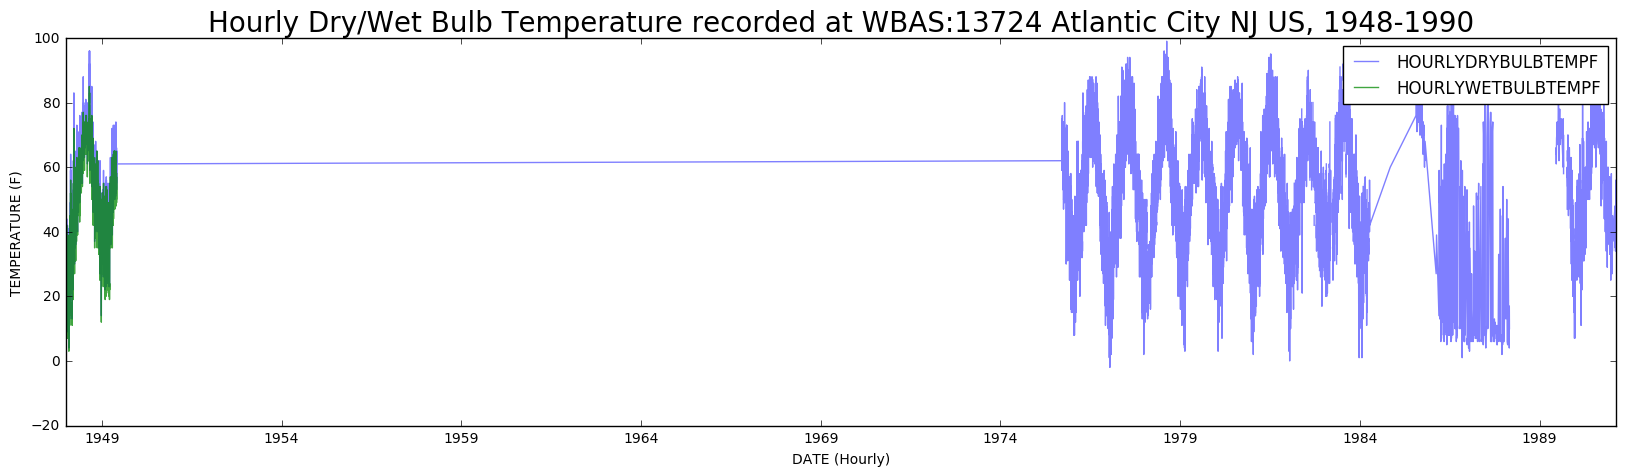

In [9]:
plt.figure(figsize=(20,5))
plt.title('Hourly Dry/Wet Bulb Temperature recorded at WBAS:13724 Atlantic City NJ US, 1948-1990', size=20)
plt.plot(dataset.DATE, dataset.HOURLYDRYBULBTEMPF, '-', c="#0000FF", markersize=5, alpha=.50)
plt.plot(dataset.DATE, dataset.HOURLYWETBULBTEMPF, '-', c="#008800", markersize=5, alpha=.75)
plt.legend(loc='upper right')
plt.xlabel('DATE (Hourly)')
plt.ylabel('TEMPERATURE (F)')
plt.show()

The above graph plots the entire dataset of Hourly Dry/Wet Bulb Temperature. By plotting the entire dataset, you are able to see a period of time with no active recordings (indicated by the straight line from 1950-1976), and possibly no recordings of wet bulb temperature after 1950 (no visible presence of the labeled green line it was assigned). Since this dataset displays a long period of time, lacks relevant data, and appears inconsistent, I would choose to look at the most complete area of data collection. I chose 1948-1949 displayed in the graph below.

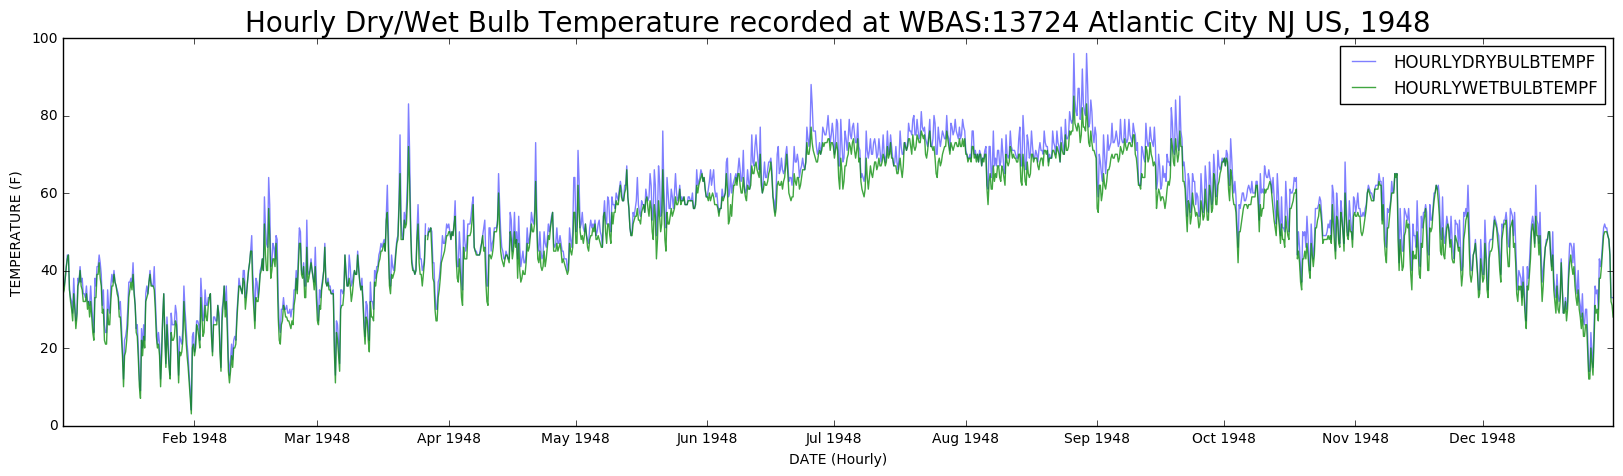

In [10]:
subset = dataset[
    (dataset.DATE >= '1948')
    & 
    (dataset.DATE  < '1949')
]
plt.figure(figsize=(20,5))
plt.title('Hourly Dry/Wet Bulb Temperature recorded at WBAS:13724 Atlantic City NJ US, 1948', size=20)
plt.plot(subset.DATE, subset.HOURLYDRYBULBTEMPF, '-', c="#0000FF", markersize=5, alpha=.50)
plt.plot(subset.DATE, subset.HOURLYWETBULBTEMPF, '-', c="#008800", markersize=5, alpha=.75)
plt.legend(loc='upper right')
plt.xlabel('DATE (Hourly)')
plt.ylabel('TEMPERATURE (F)')
plt.show()

This graph especially follows the principles of compatibility, informative changes, and salience. The large perceptual difference within the overall parabola shape of the graph show the warmest temperatures, either dry or wet bulb, occur during our summer months here in New Jersey. Readers are able to interpret the relationship between the wet and dry bulb temperature after understanding the definitions of the two that I would include in a graph explanation provided below.

I thought it was important to understand the terms, they are defined here:

Dry Bulb Temp (F): This is the dry-bulb temperature and is commonly used as the standard air temperature reported.

Wet Bulb Temp (F): If it was cooled to saturation (100% relative humidity) with evaporation of water into it.

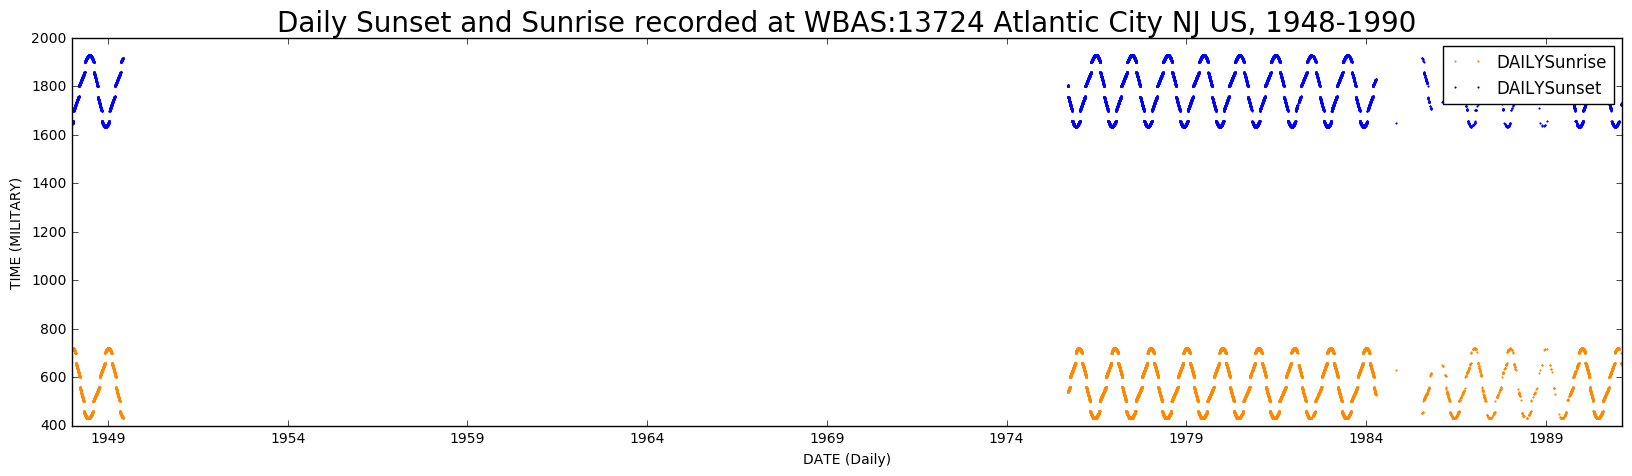

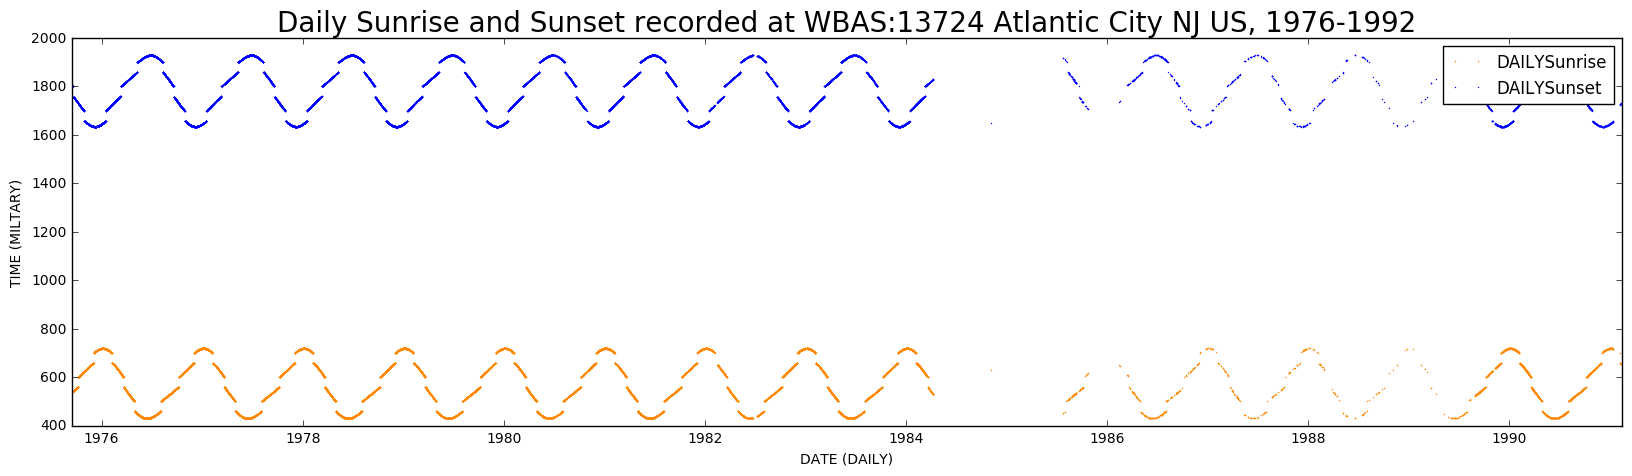

In [11]:
plt.figure(figsize=(20,5))
plt.title('Daily Sunset and Sunrise recorded at WBAS:13724 Atlantic City NJ US, 1948-1990', size=20)
plt.plot(dataset.DATE, dataset.DAILYSunrise, '.', c='#FF8800', markersize=2, alpha=1)
plt.plot(dataset.DATE, dataset.DAILYSunset, '.',  c='#0000FF', markersize=2, alpha=1)
plt.legend(loc='upper right')
plt.xlabel('DATE (Daily)')
plt.ylabel('TIME (MILITARY)')
plt.show()

plt.figure(figsize=(20,5))
plt.title('Daily Sunrise and Sunset recorded at WBAS:13724 Atlantic City NJ US, 1976-1992', size=20)
subset = dataset[(dataset.DATE >= '1975') & (dataset.DATE < '2017')]
plt.plot(subset.DATE, subset.DAILYSunrise, '.', c='#FF8800', markersize=1, alpha=1)
plt.plot(subset.DATE, subset.DAILYSunset, '.',  c='#0000FF', markersize=1, alpha=1)
plt.legend(loc='upper right')
plt.xlabel('DATE (DAILY)')
plt.ylabel('TIME (MILTARY)')
plt.show()

These two graphs displaying the sunset and sunrise are overall consistent. Background knowledge is needed to understand that the Earth is rotating at a constant rate that does not change. Humans create a leap year every four years to account for the amount of time the Earth takes to orbit around the sun (365.25 days). This graph shows us that we can predict the sunrise and sunset at any time in the future (Or any time of lacking data) because it will always be the same, due to the combination of the Earth orbiting rate around the sun, and Earth rotating on it's own axis, which do not change.

According to Kossyln's Principles this graph displays pattern appearances that are compatible with what it symbolizes. The visual pattern does not require the reader to memorize many groups of data since it is consistent. I chose a scatter plot for this data because if it was a line graph, it would distort the consistentcy by connecting the points inbetween lacking data areas to visually show a different pattern of the data (or perhaps none at all if the lines were taken as data slopes). According to Tufte's principles, you should avoid distorting the data, which is what creating a line graph would do.

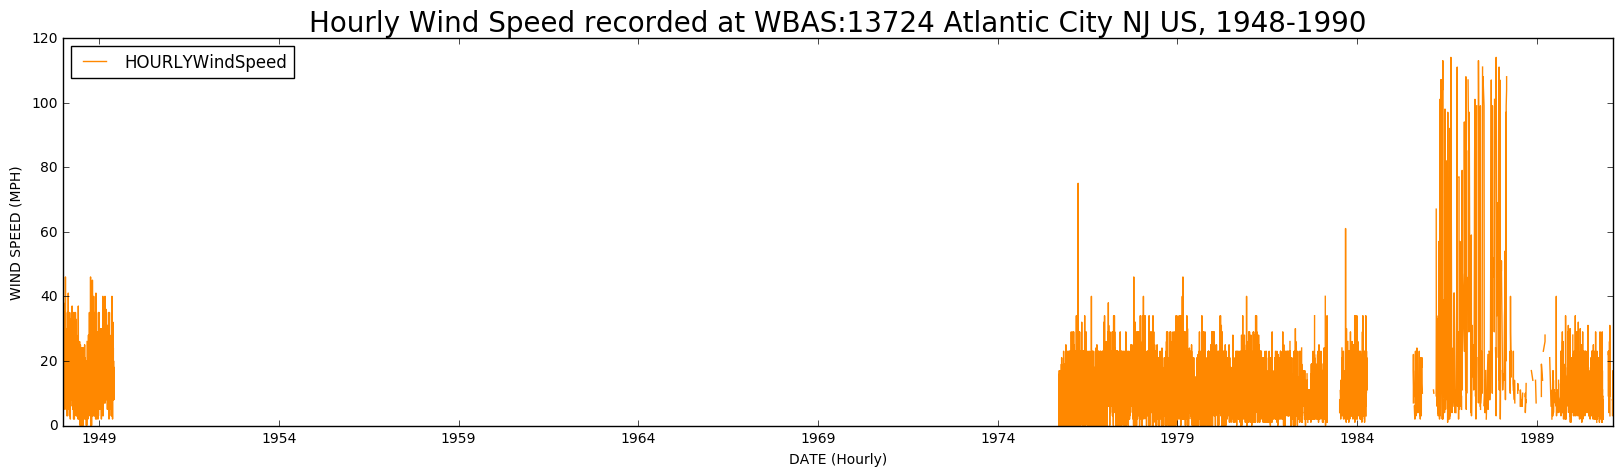

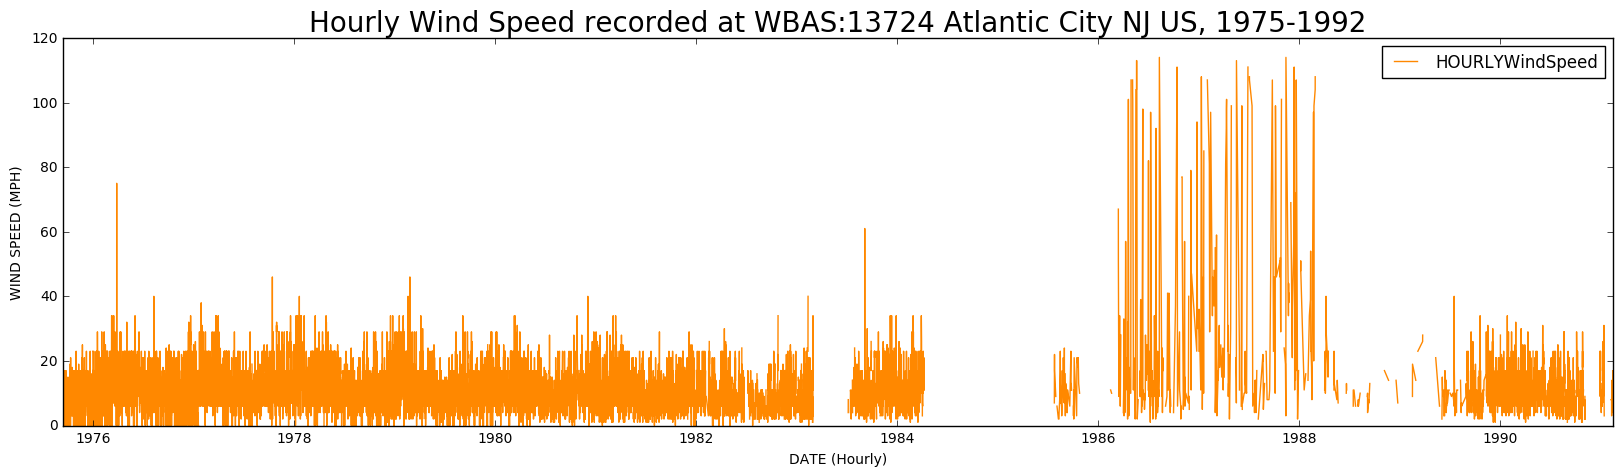

In [12]:
plt.figure(figsize=(20,5))
plt.title('Hourly Wind Speed recorded at WBAS:13724 Atlantic City NJ US, 1948-1990', size=20)
plt.plot(dataset.DATE, dataset.HOURLYWindSpeed, '-', c='#FF8800', markersize=2, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('DATE (Hourly)')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

plt.figure(figsize=(20,5))
plt.title('Hourly Wind Speed recorded at WBAS:13724 Atlantic City NJ US, 1975-1992', size=20)
subset = dataset[(dataset.DATE >= '1975') & (dataset.DATE < '2017')]
plt.plot(subset.DATE, subset.HOURLYWindSpeed, '-', c='#FF8800', markersize=1, alpha=1)
plt.legend(loc='upper right')
plt.xlabel('DATE (Hourly)')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

Hmm...looks like the wind was hitting over 100mph consistently from 1986-1988? Let's zoom it on just that data:

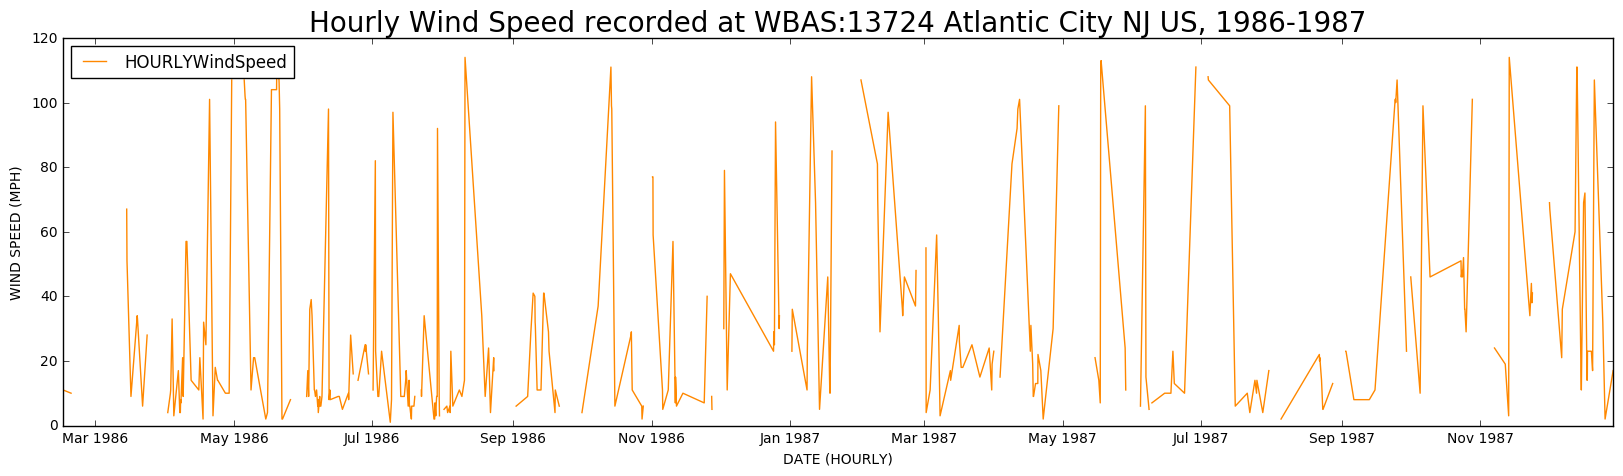

In [13]:
plt.figure(figsize=(20,5))
plt.title('Hourly Wind Speed recorded at WBAS:13724 Atlantic City NJ US, 1986-1987', size=20)
subset = dataset[(dataset.DATE >= 'January 1986') & (dataset.DATE < 'January 1988')]
plt.plot(subset.DATE, subset.HOURLYWindSpeed, '-', c='#FF8800', markersize=3, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('DATE (HOURLY)')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

Looks like Atlantic City had some constant hurricane weather moving through for a few years...? Just kidding, I would think this most likely implies non consistent data, different units recorded or faulty equipment. I doubled checked the values by printing the data column.

In [14]:
hourly_wind_dataset = pd.read_csv(
    "893206.csv", 
    usecols = ["DATE", "HOURLYWindSpeed"],
    converters = {
        "HOURLYWindSpeed": my_convert_function
    },
    low_memory=False
)

I made sure the column removed the "s" like it was told to before with the converter function, 
and looks like it did, because the original .csv displays "114s". By just removing the "s" though, it is reading the cell as 114mph.

In [15]:
hourly_wind_dataset.HOURLYWindSpeed.max()

114.0

Special Indicator Appendix:
s = suspect value (appears with value)
Defined from = https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/LCD_documentation.pdf

After searching what the "s" stands for and having background knowledge that wind speed in New Jersey does not consistently hit 100+mph, I would decide to omit these years (1986-1987) from the dataset for any type of analysis.

Although I would ultimately decide to omit that section of the dataset, Tufte's principles helped arrive at that conclusion by suggesting to look at the dataset at several layers of detail to encourage eyes to actively compare the data. We are presenting many numbers and data points in a small space that convey a larger idea of a wind speed pattern.

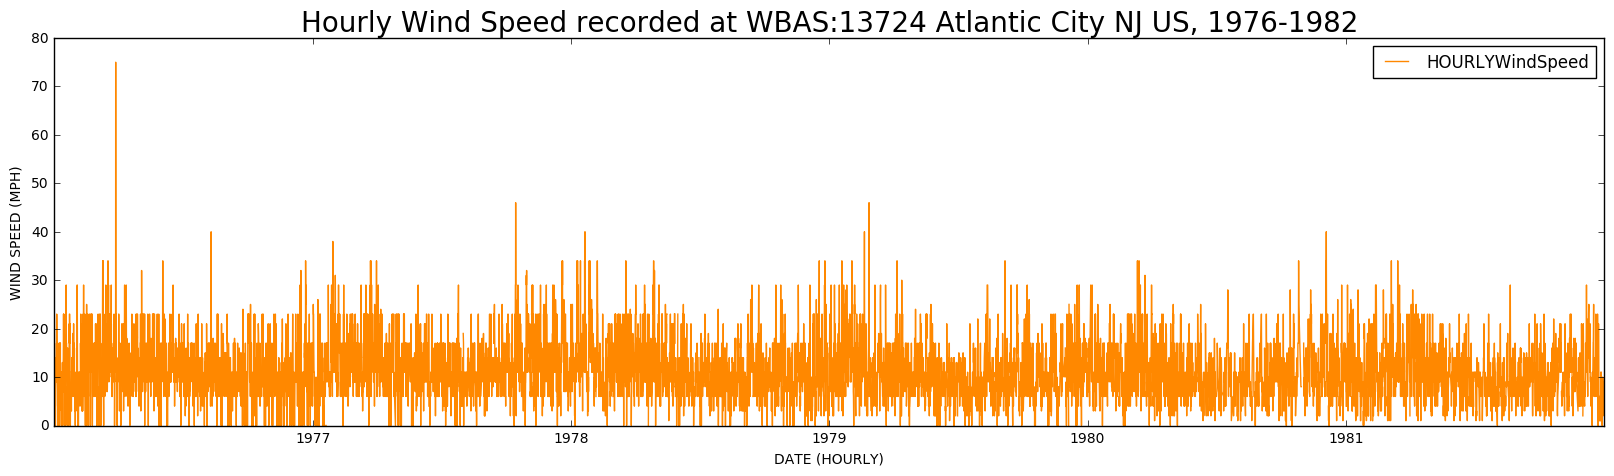

In [16]:
plt.figure(figsize=(20,5))
plt.title('Hourly Wind Speed recorded at WBAS:13724 Atlantic City NJ US, 1976-1982', size=20)
subset = dataset[(dataset.DATE >= 'January 1976') & (dataset.DATE < 'January 1982')]
plt.plot(subset.DATE, subset.HOURLYWindSpeed, '-', c='#FF8800', markersize=3, alpha=1)
plt.legend(loc='upper right')
plt.xlabel('DATE (HOURLY)')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

Plotting many data points in a small space are useful to developing patterns in datasets. The next graph shows the smallest time interval of just one year to see if the data is consistent with hurricane season in New Jersey.

From Google: "Though the national hurricane season normally runs from June 1 through November 30, the peak potential for hurricane and tropical storm activity in New Jersey runs from mid-August through the end of October."

There are a few different peaks of hourly wind speed recorded in Atlantic City during 1977, but one data point that satisfies the above statement is the 40+mph winds in October 1977. Perhaps to further analyze this data, a "best fit" trend line may help to better satisfy the above statement over a longer period of time.

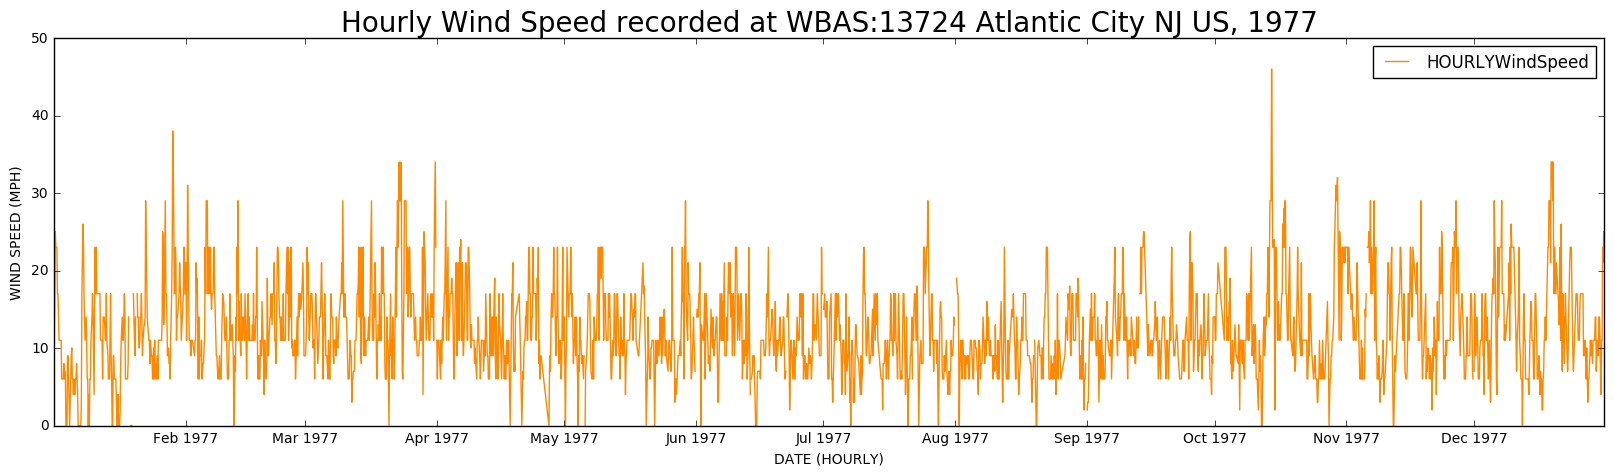

In [17]:
plt.figure(figsize=(20,5))
plt.title('Hourly Wind Speed recorded at WBAS:13724 Atlantic City NJ US, 1977', size=20)
subset = dataset[(dataset.DATE >= 'January 1977') & (dataset.DATE < 'January 1978')]
plt.plot(subset.DATE, subset.HOURLYWindSpeed, '-', c='#FF8800', markersize=3, alpha=1)
plt.legend(loc='upper right')
plt.xlabel('DATE (HOURLY)')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

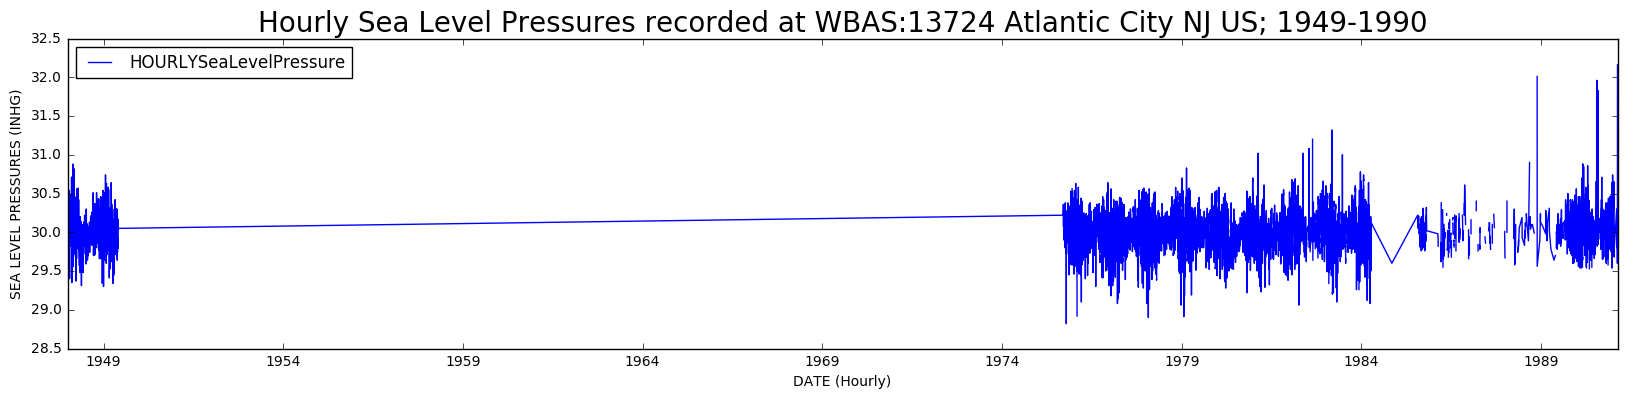

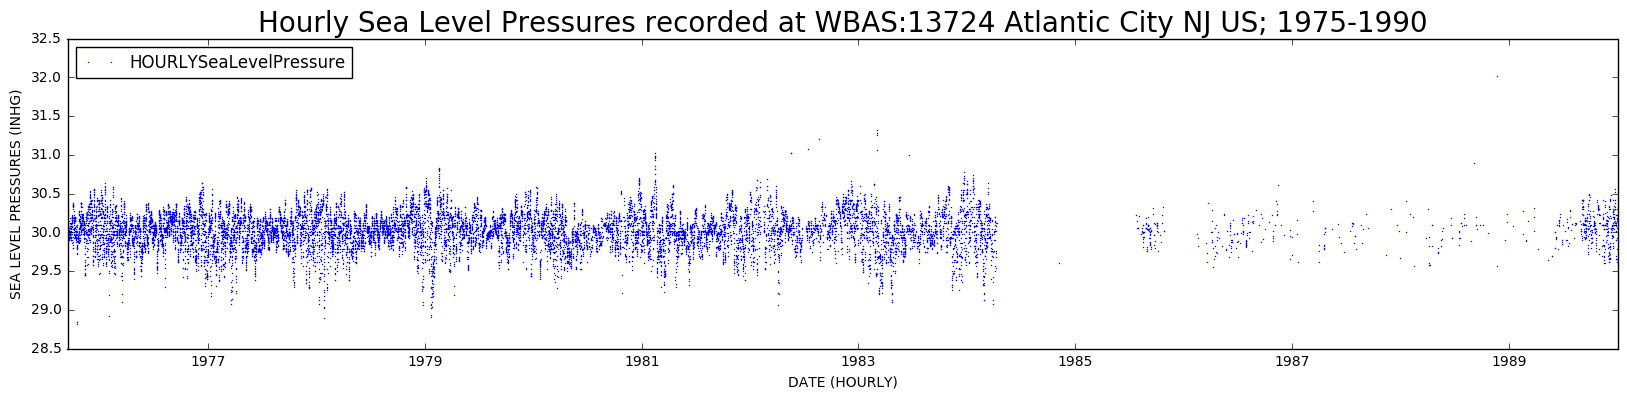

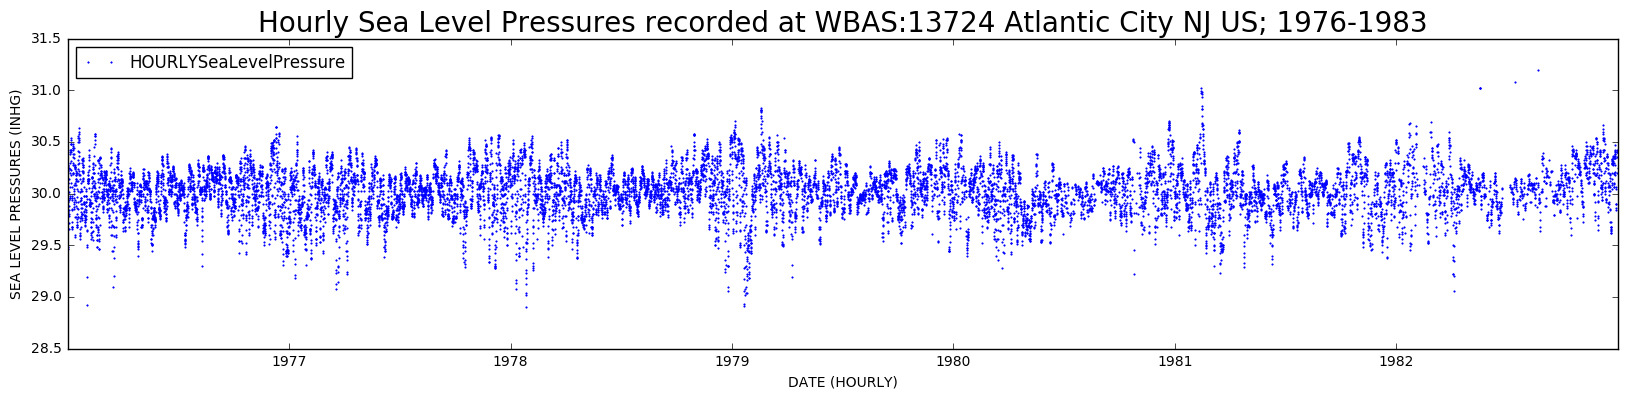

In [18]:
plt.figure(figsize=(20,4))
plt.title('Hourly Sea Level Pressures recorded at WBAS:13724 Atlantic City NJ US; 1949-1990', size=20)
plt.plot(dataset.DATE, dataset.HOURLYSeaLevelPressure,'-', markersize=1)
plt.legend(loc='upper left')
plt.xlabel('DATE (Hourly)')
plt.ylabel('SEA LEVEL PRESSURES (INHG)')
plt.show()

plt.figure(figsize=(20,4))
plt.title('Hourly Sea Level Pressures recorded at WBAS:13724 Atlantic City NJ US; 1975-1990', size=20)
subset = dataset[(dataset.DATE >= 'January 1975') & (dataset.DATE < 'January 1990')]
plt.plot(subset.DATE, subset.HOURLYSeaLevelPressure,'.', markersize=1)
plt.legend(loc='upper left')
plt.xlabel('DATE (HOURLY)')
plt.ylabel('SEA LEVEL PRESSURES (INHG)')
plt.show()

plt.figure(figsize=(20,4))
plt.title('Hourly Sea Level Pressures recorded at WBAS:13724 Atlantic City NJ US; 1976-1983', size=20)
subset = dataset[(dataset.DATE >= 'January 1976') & (dataset.DATE < 'January 1983')]
plt.plot(subset.DATE, subset.HOURLYSeaLevelPressure,'.', markersize=2)
plt.legend(loc='upper left')
plt.xlabel('DATE (HOURLY)')
plt.ylabel('SEA LEVEL PRESSURES (INHG)')
plt.show()

By completing this assignment I learned there are many differences between a line plot and a scatter plot in Matplotlib, and to choose the option that not just looks "cleaner" but more importantly, does not distort the data. A line plot connects all data points as you can see in the first graph. If you look at that first graph as a whole, it may distort the data. Scatter plots are more separated and allows the reader to visually see areas completely missing or lacking data. This also allows for readers to focus on the content of the data and not the way it is designed.

<b>Wildwood/Cape May Airport Local Climatology Data</b>

In [39]:
import pandas as pd
import matplotlib.pylab as plt
pd.set_option("display.max_rows", 5)
pd.set_option("display.max_columns", 1)
%matplotlib inline
WWCMdataset = pd.read_csv("903150.csv")
print(WWCMdataset)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,19,20,21,22,24,26,27,39,40,41,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


           STATION     ...    
0       WBAN:03726     ...    
1       WBAN:03726     ...    
...            ...     ...    
267146         NaN     ...    
267147         NaN     ...    

[267148 rows x 96 columns]


In [40]:
for x in [8,9,10,11,12,13,14,15,16,17,19,20,21,22,24,26,27,39,40,41]:
    print(unclean_dataset.columns[x])

HOURLYVISIBILITY
HOURLYPRSENTWEATHERTYPE
HOURLYDRYBULBTEMPF
HOURLYDRYBULBTEMPC
HOURLYWETBULBTEMPF
HOURLYWETBULBTEMPC
HOURLYDewPointTempF
HOURLYDewPointTempC
HOURLYRelativeHumidity
HOURLYWindSpeed
HOURLYWindGustSpeed
HOURLYStationPressure
HOURLYPressureTendency
HOURLYPressureChange
HOURLYPrecip
DAILYMaximumDryBulbTemp
DAILYMinimumDryBulbTemp
DAILYSnowfall
DAILYSnowDepth
DAILYAverageStationPressure


In [41]:
def my_convert_function(val):
    if len(val) > 0:
        val = val.replace("s", "")
        try:
            return float(val)
        except:
            print("I could not convert the value: '", val, "'")
            
    return None

hourly_precip_dataset = pd.read_csv(
    "903150.csv", 
    usecols = ["DATE", "HOURLYPrecip"],
    converters = {
        "HOURLYPrecip": my_convert_function
    },
    low_memory=False
)

#############################

def convert_example_2(val):
    if len(val) > 0 and val != 'VRB':
        try:
            val = val.replace("s", "")
            return float(val)
        except:
            try:
                return float(val.split(" ")[0])
            except:
                print("Could not convert: ", val)
                return None

dataset = pd.read_csv(
    "903150.csv", 
    parse_dates = [ "DATE" ],
    converters = {
        "HOURLYVISIBILITY":    convert_example_2,
        "HOURLYPRSENTWEATHERTYPE":    convert_example_2,
        "HOURLYDRYBULBTEMPF":    convert_example_2,
        "HOURLYDRYBULBTEMPC":    convert_example_2,
        "HOURLYWETBULBTEMPF":    convert_example_2,
        "HOURLYWETBULBTEMPC":    convert_example_2,
        "HOURLYDewPointTempF":    convert_example_2,
        "HOURLYDewPointTempC":    convert_example_2,
        "HOURLYRelativeHumidity":    convert_example_2,
        "HOURLYWindSpeed":    convert_example_2,
        "HOURLYWindGustSpeed":    convert_example_2,
        "CMWWRCWindSpeedMIN":   convert_example_2,
        "CMWWRCWindSpeedMAX":   convert_example_2,
        "HOURLYStationPressure":    convert_example_2,
        "HOURLYPressureChange":    convert_example_2,
        "HOURLYPrecip":    convert_example_2,
        "HOURLYAltimeterSetting":    convert_example_2,
        "DAILYWeather":    convert_example_2,
        "DAILYPrecip":    convert_example_2,
        "CMWWRCSEATEMP":   convert_example_2
    }, 
    low_memory=False
)

I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I could not convert the value: ' T '
I

In [22]:
hourly_precip_dataset.HOURLYPrecip.max()

10.06

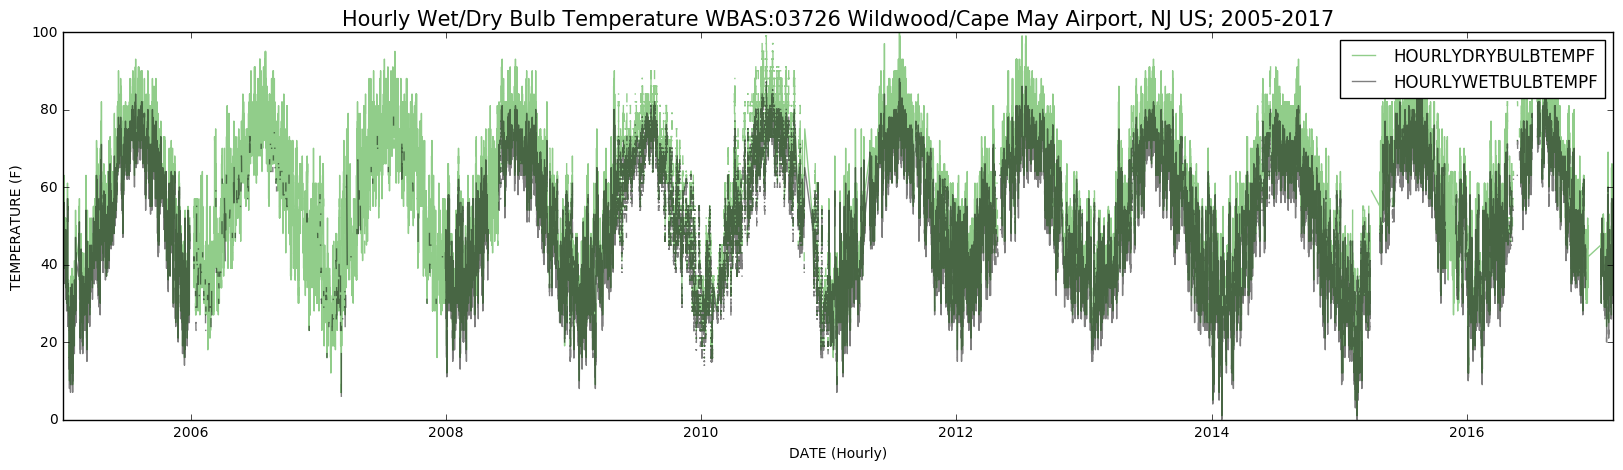

In [24]:
#m=Save graph as a .PDF
plt.figure(figsize=(20,5))
plt.title('Hourly Wet/Dry Bulb Temperature WBAS:03726 Wildwood/Cape May Airport, NJ US; 2005-2017', size=15)
plt.plot(dataset.DATE, dataset.HOURLYDRYBULBTEMPF, '-', c="#249D17", markersize=5, alpha=.50)
plt.plot(dataset.DATE, dataset.HOURLYWETBULBTEMPF, '-', c="#000000", markersize=5, alpha=.50)
plt.legend(loc='upper right')
plt.xlabel('DATE (Hourly)')
plt.ylabel('TEMPERATURE (F)')
plt.show()
#m.savefig("wetdrybulbWWCM.pdf", bbox_inches='tight')

#Dry Bulb Temp (F): This is the dry-bulb temperature and is commonly used as the standard air temperature reported.
#Wet Bulb Temp (F): If it was cooled to saturation (100% relative humidity) with evaporation of water into it.

The Hourly Wet/Dry Bulb Temperature for the Wildwood/Cape May Station is a lot more complete than the Atlantic City Station. I decided to plot the dry bulb temperature a lighter color than the wet bulb temperature because generally the dry bulb temperature will always be higher than the wet bulb temperature.

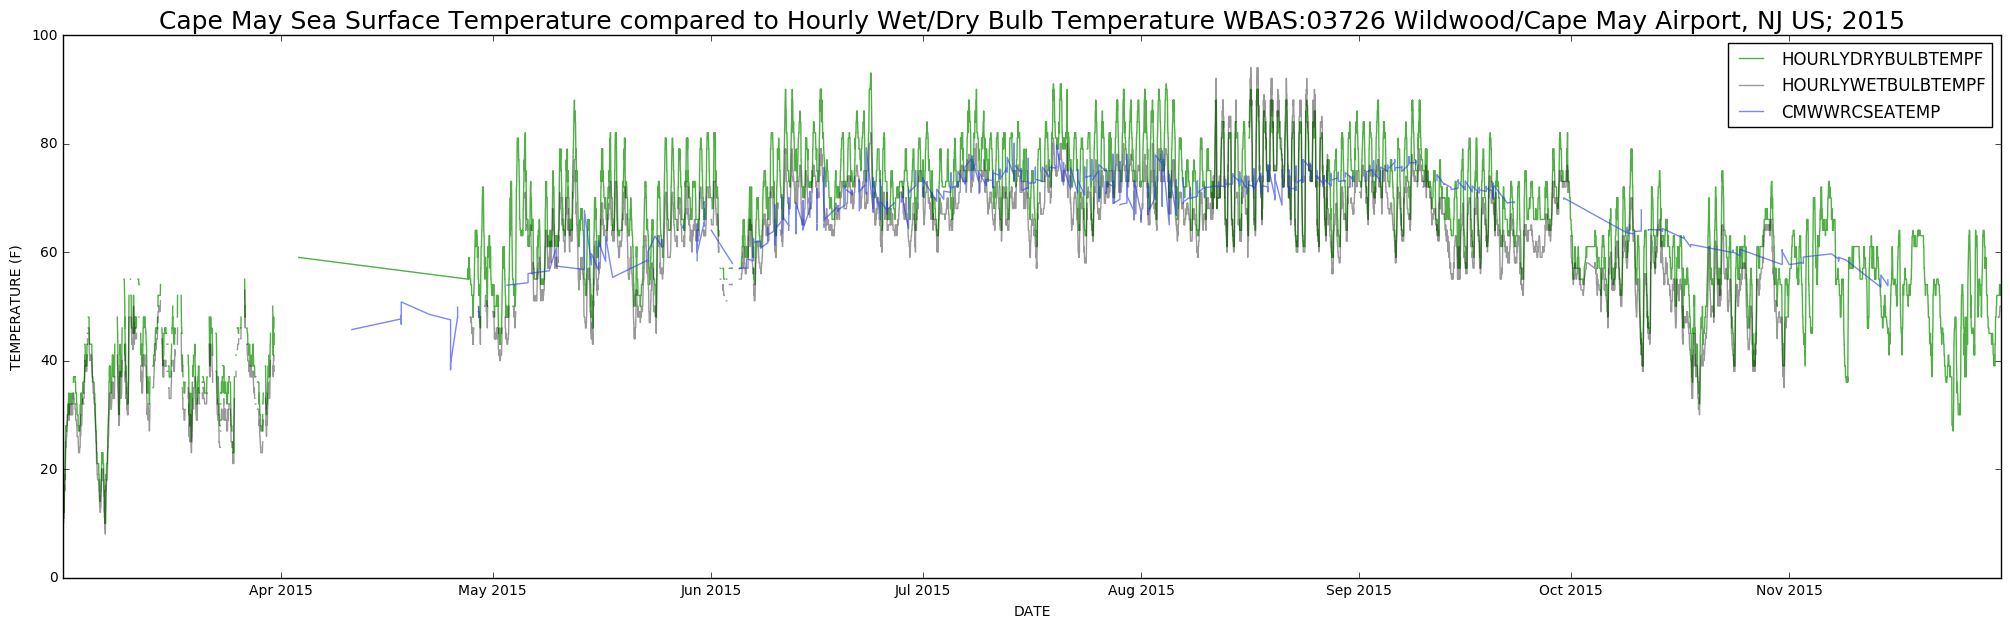

In [25]:
subset = dataset[
    (dataset.DATE >= 'March 2015')
    & 
    (dataset.DATE  < 'December 2015')
]
plt.figure(figsize=(25,7))
plt.title('Cape May Sea Surface Temperature compared to Hourly Wet/Dry Bulb Temperature WBAS:03726 Wildwood/Cape May Airport, NJ US; 2015', size=18)
plt.plot(subset.DATE, subset.HOURLYDRYBULBTEMPF, '-', c="#249D17", markersize=5, alpha=.80)
plt.plot(subset.DATE, subset.HOURLYWETBULBTEMPF, '-', c="#000000", markersize=5, alpha=.40)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '-', c="#2337F0", markersize=10, alpha= .60)
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')
plt.show()

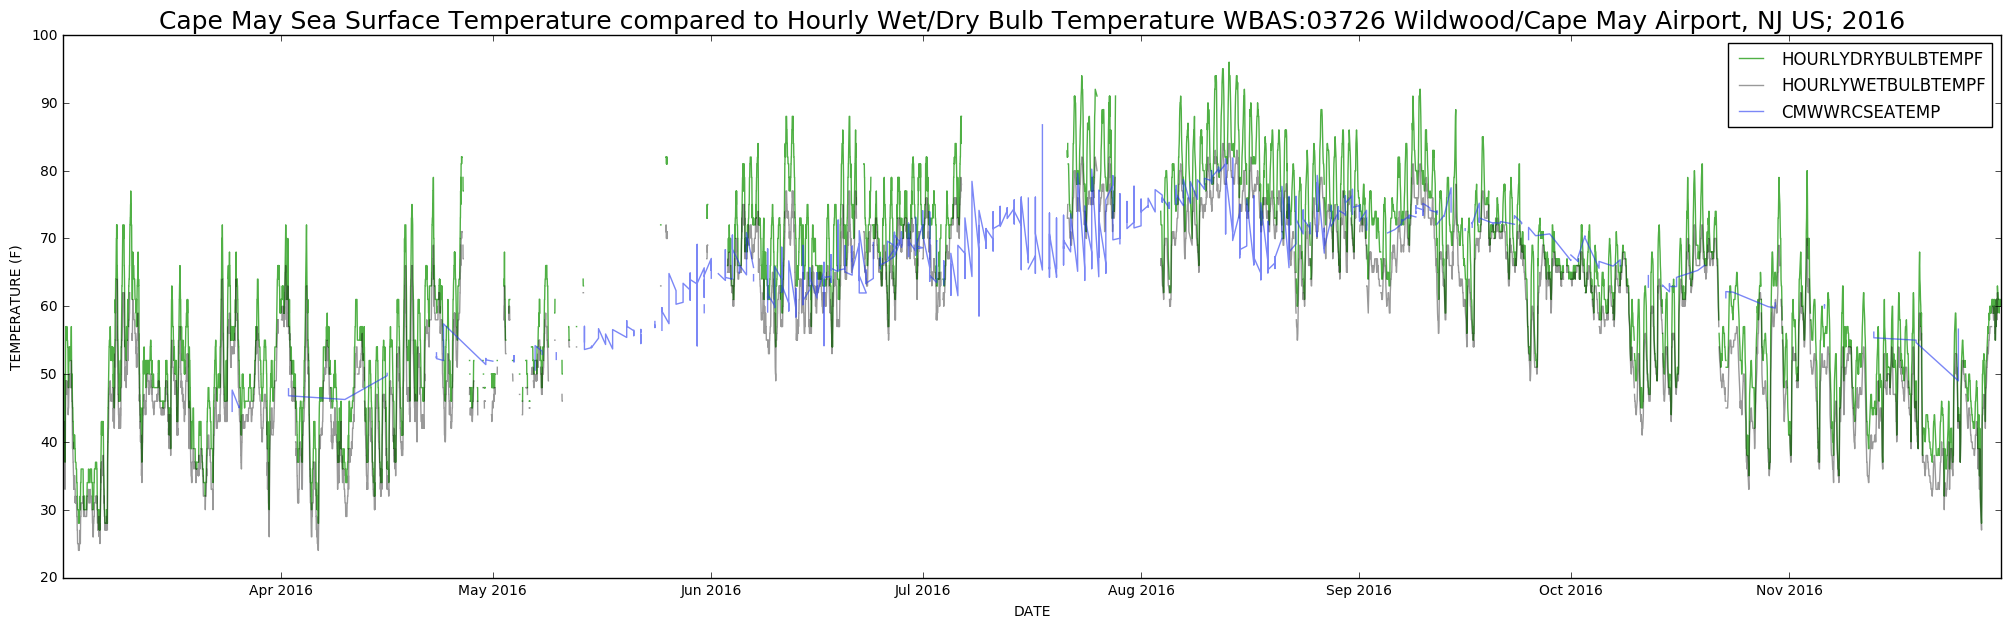

In [26]:
subset = dataset[
    (dataset.DATE >= 'March 2016')
    & 
    (dataset.DATE  < 'December 2016')
]
plt.figure(figsize=(25,7))
plt.title('Cape May Sea Surface Temperature compared to Hourly Wet/Dry Bulb Temperature WBAS:03726 Wildwood/Cape May Airport, NJ US; 2016', size=18)
plt.plot(subset.DATE, subset.HOURLYDRYBULBTEMPF, '-', c="#249D17", markersize=5, alpha=.80)
plt.plot(subset.DATE, subset.HOURLYWETBULBTEMPF, '-', c="#000000", markersize=5, alpha=.40)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '-', c="#2337F0", markersize=10, alpha= .60)
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')
plt.show()

I decided to incorporate some data from the whale watch to see how it compared to an inland station. Unfortunetly, the areas of the most data collection of sea surface temperature on the whale watch (Particularly the summer months of June and July) seem to be the least amount of data provided by the airport station. Let's try to zoom in on just June and July:

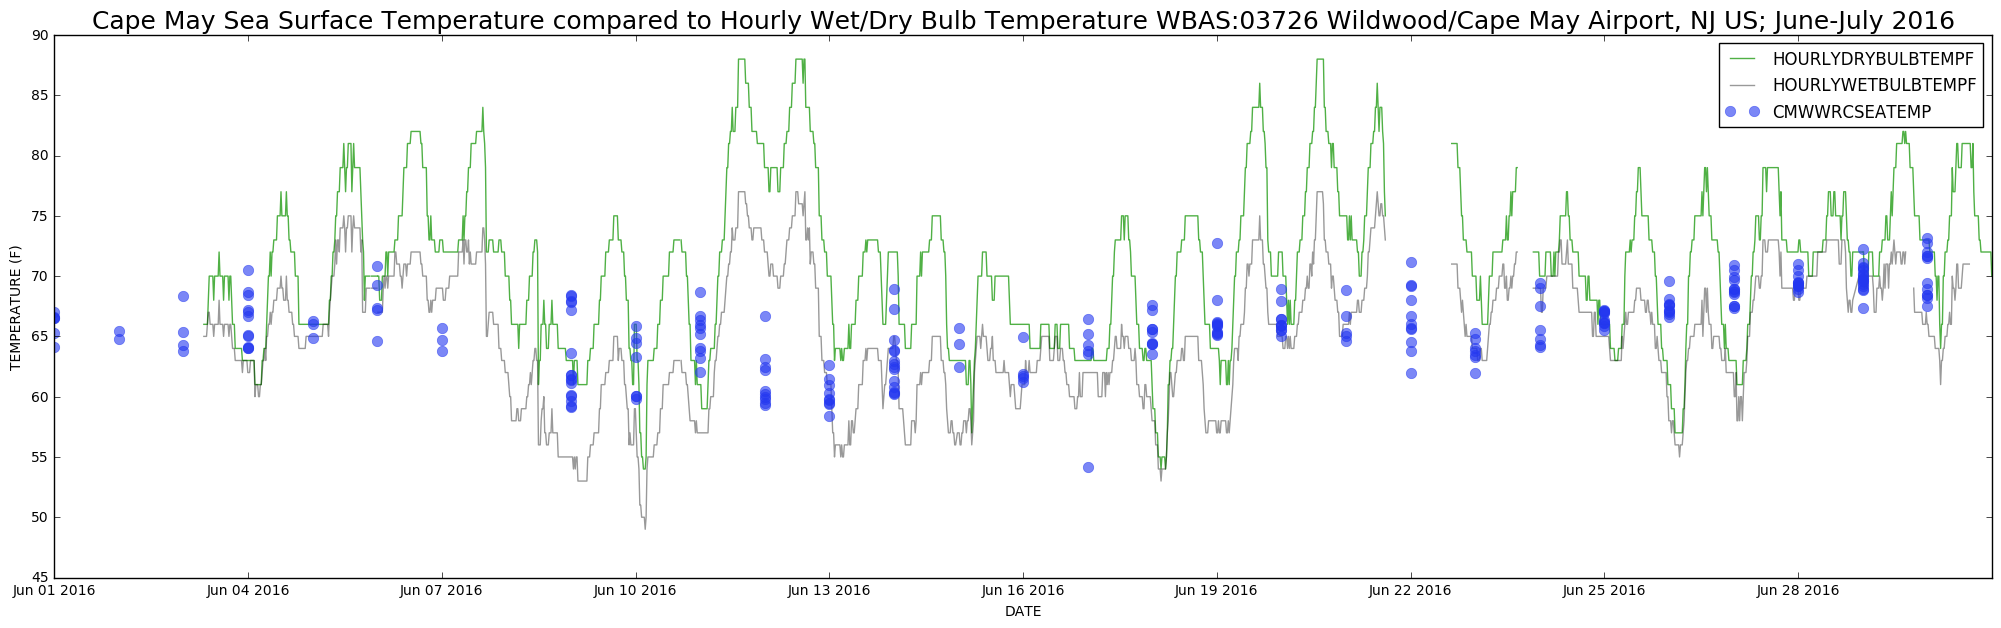

In [27]:
subset = dataset[
    (dataset.DATE >= 'June 2016')
    & 
    (dataset.DATE  < 'July 2016')
]
plt.figure(figsize=(25,7))
plt.title('Cape May Sea Surface Temperature compared to Hourly Wet/Dry Bulb Temperature WBAS:03726 Wildwood/Cape May Airport, NJ US; June-July 2016', size=18)
plt.plot(subset.DATE, subset.HOURLYDRYBULBTEMPF, '-', c="#249D17", markersize=5, alpha=.80)
plt.plot(subset.DATE, subset.HOURLYWETBULBTEMPF, '-', c="#000000", markersize=5, alpha=.40)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '.', c="#2337F0", markersize=15, alpha= .60)
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')
plt.show()

From this graph, there is a steady increase in both hourly wet/dry bulb temperatures and the sea surface temperature from June 13th to the start of July. Like I mentioned before, if I were to make sea surface temperature during this specfic time interval a line plot, it would infer there is data on days where no data was taken. Perhaps an np.convolve() line with sea surface temperature would be more appropriate than just a general line plot of all data points.

In [28]:
import numpy as np
import pandas as pd

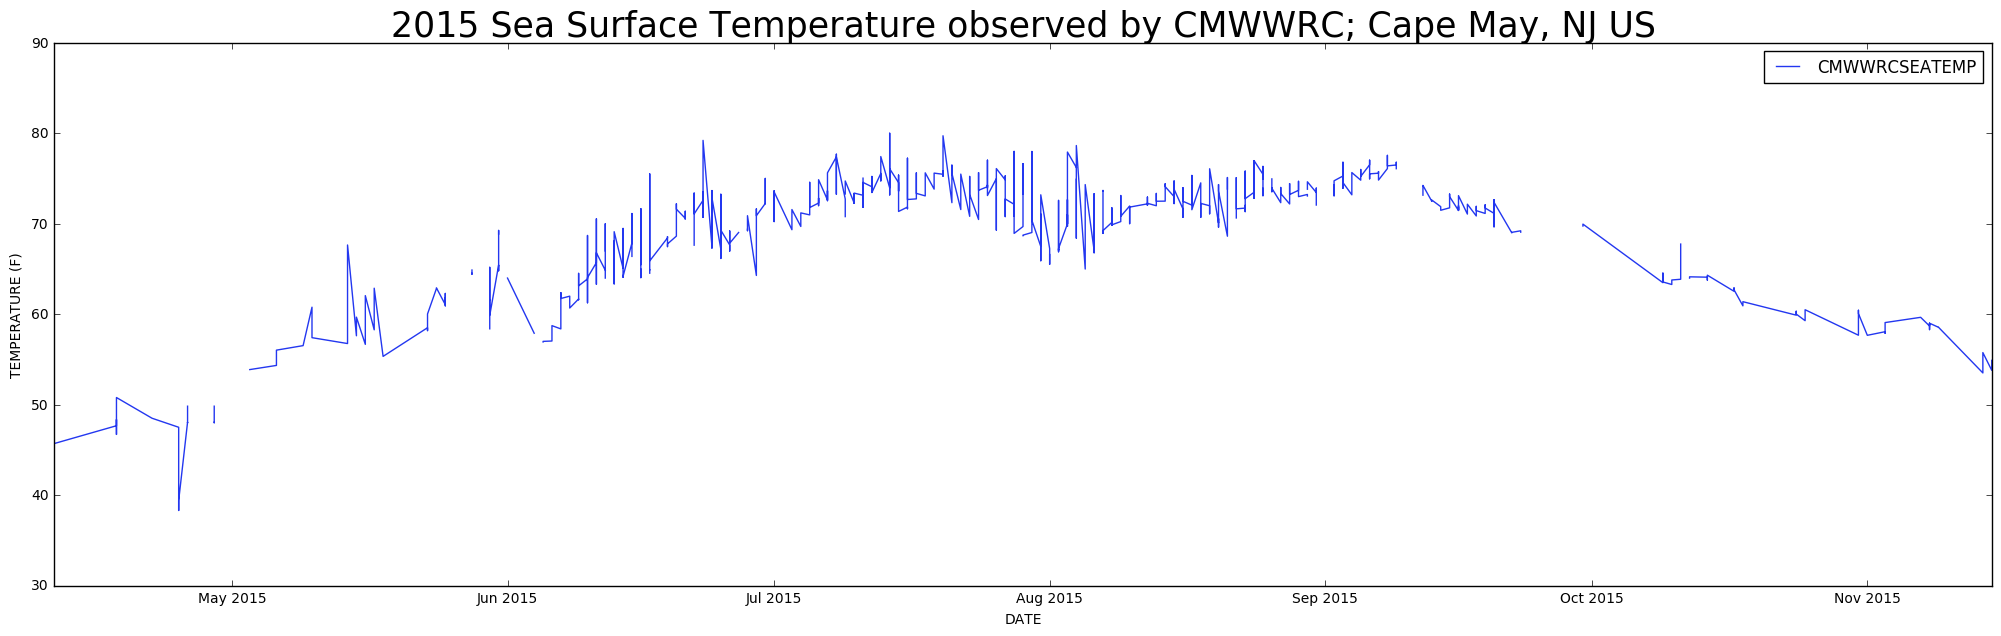

In [29]:
subset = dataset[
    (dataset.DATE >= 'March 2015')
    & 
    (dataset.DATE  < 'December 2015')
]
#print subset.head()
#r=9

plt.figure(figsize=(25,7))
plt.title('2015 Sea Surface Temperature observed by CMWWRC; Cape May, NJ US', size=25)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '-', c="#2337F0", markersize=10)
#for m in subset:
    #plt.plot(np.convolve(len(subset), r));
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')
plt.show()

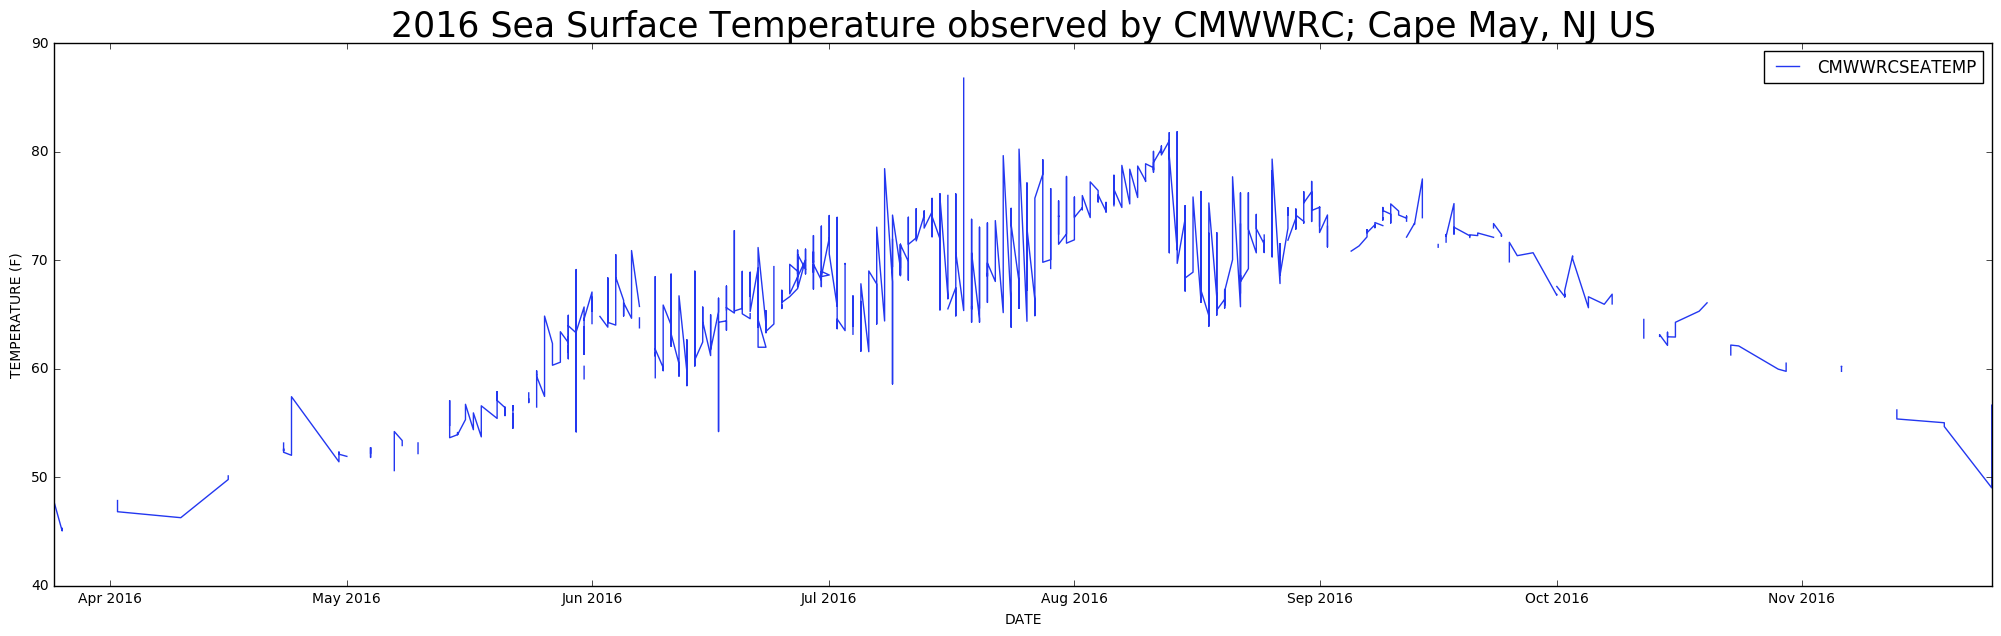

In [34]:
subset = dataset[
    (dataset.DATE >= 'March 2016')
    & 
    (dataset.DATE  < 'December 2016')
]
#print subset.head()
#r=9

plt.figure(figsize=(25,7))
plt.title('2016 Sea Surface Temperature observed by CMWWRC; Cape May, NJ US', size=25)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '-', c="#2337F0", markersize=10)
#for m in subset:
    #plt.plot(np.convolve(len(subset), r));
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')
plt.show()

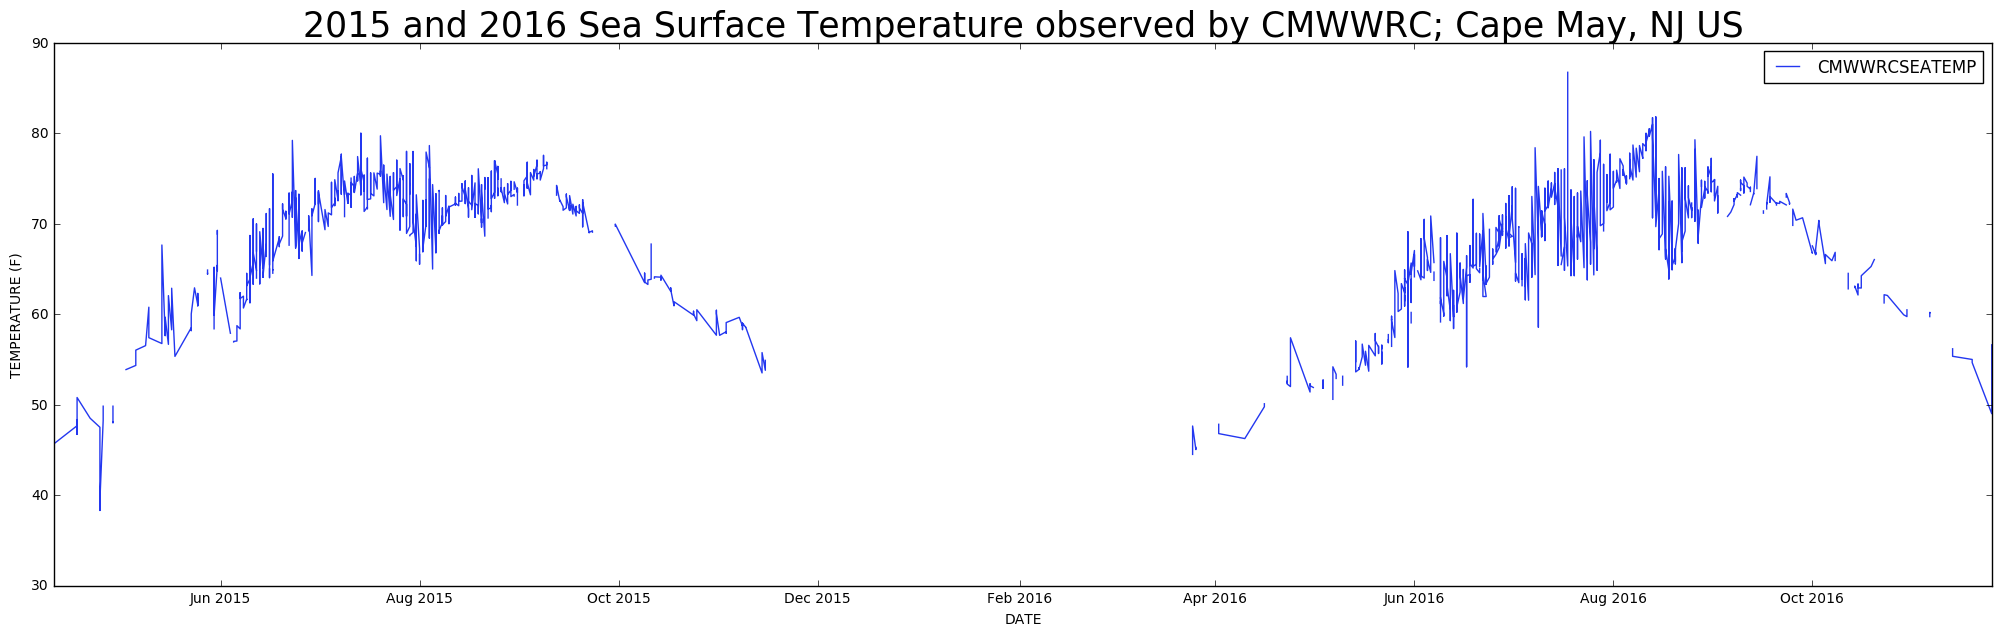

In [52]:
subset = dataset[
    (dataset.DATE >= 'February 2015')
    & 
    (dataset.DATE  < 'December 2016')
]
#print subset.head()
#r=9

plt.figure(figsize=(25,7))
plt.title('2015 and 2016 Sea Surface Temperature observed by CMWWRC; Cape May, NJ US', size=25)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '-', c="#2337F0", markersize=10)
#for m in subset:
    #plt.plot(np.convolve(len(subset), r));
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('TEMPERATURE (F)')
plt.show()

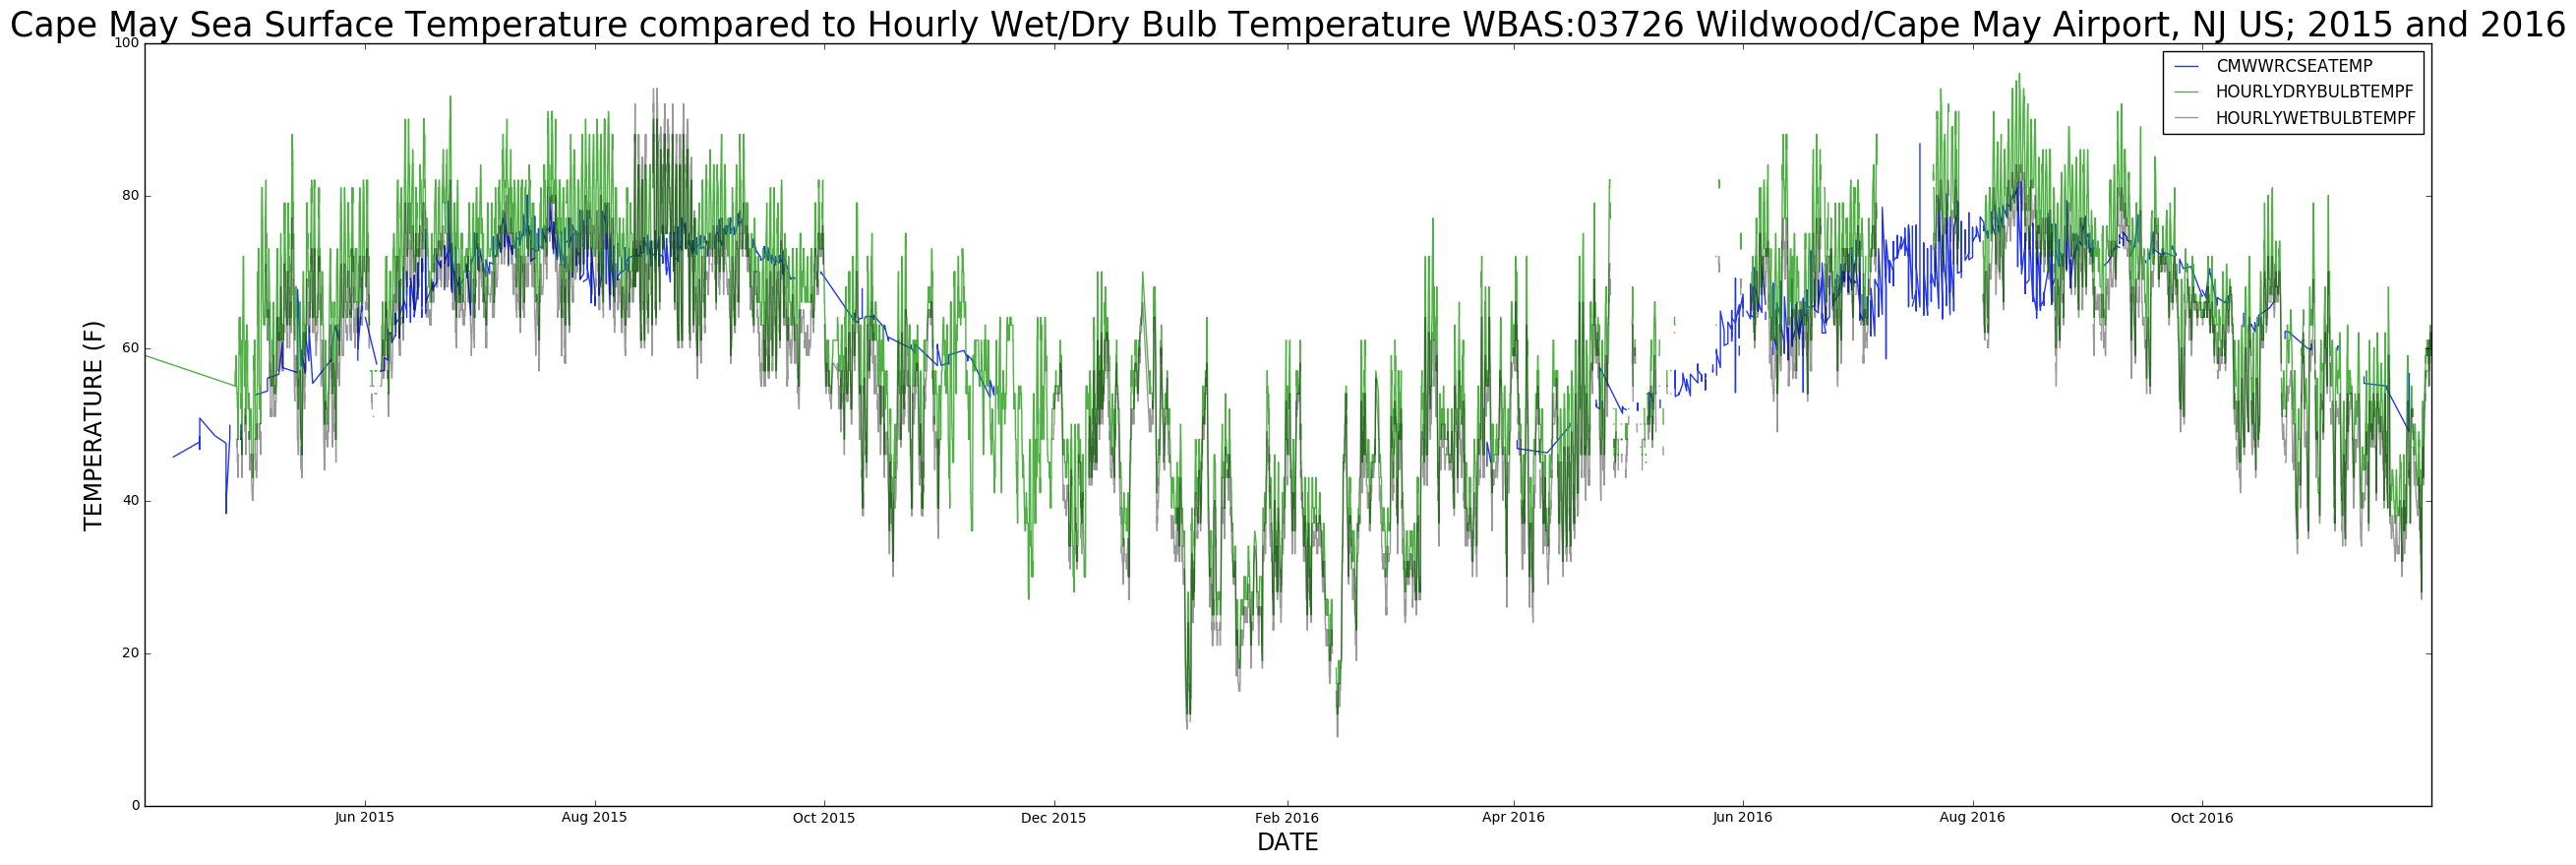

In [49]:
subset = dataset[
    (dataset.DATE >= 'April 2015')
    & 
    (dataset.DATE  < 'December 2016')
]
#print subset.head()
#r=9

plt.figure(figsize=(30,10))
plt.title('Cape May Sea Surface Temperature compared to Hourly Wet/Dry Bulb Temperature WBAS:03726 Wildwood/Cape May Airport, NJ US; 2015 and 2016', size=25)
plt.plot(subset.DATE, subset.CMWWRCSEATEMP, '-', c="#2337F0", markersize=10)
plt.plot(subset.DATE, subset.HOURLYDRYBULBTEMPF, '-', c="#249D17", markersize=5, alpha=.80)
plt.plot(subset.DATE, subset.HOURLYWETBULBTEMPF, '-', c="#000000", markersize=5, alpha=.40)
#for m in subset:
    #plt.plot(np.convolve(len(subset), r));
plt.legend(loc='upper right')
plt.xlabel('DATE', size=17)
plt.ylabel('TEMPERATURE (F)', size=17)
plt.show()

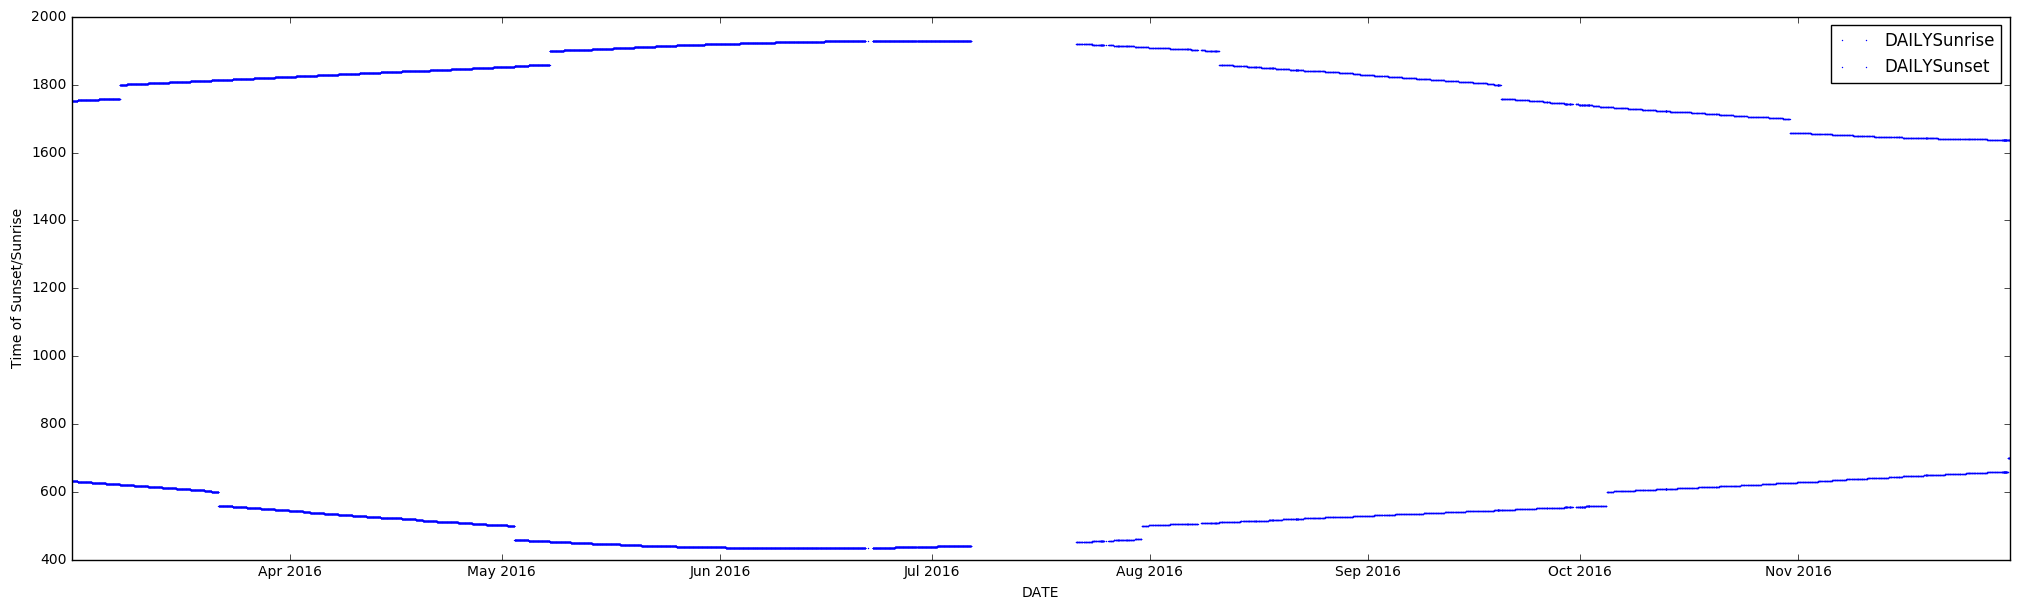

In [98]:
subset = dataset[
    (dataset.DATE >= 'March 2016')
    & 
    (dataset.DATE  < 'December 2016')
]
#print subset.head()
#r=9

plt.figure(figsize=(25,7))
plt.plot(subset.DATE, subset.DAILYSunrise, '.',  c='#0000FF', markersize=1, alpha=1)
plt.plot(subset.DATE, subset.DAILYSunset, '.',  c='#0000FF', markersize=1, alpha=1)
#for m in subset:
    #plt.plot(np.convolve(len(subset), r));
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('Time of Sunset/Sunrise')
plt.show()

For future analysis of the sea surface temperature observed by the whale watch, I believe it is important to consider the following:

-Sea surface temperature is taken per sighting per day of trip. Sightings occur at different times of each day of data. The time is not consistent.

-The location is not consistent. There are two bodies of water we travel through around the island of Cape May. We see marine mammals in both of these locations, the Delaware Bay and the Atlantic Ocean. Typically, the bay is warmer than the ocean because it is more surrounded by land. These temperature readings include sightings from both the Delware Bay and the Atlantic Ocean.

-Generally, there is a temperature increase in both of these bodies of water during the summer months.

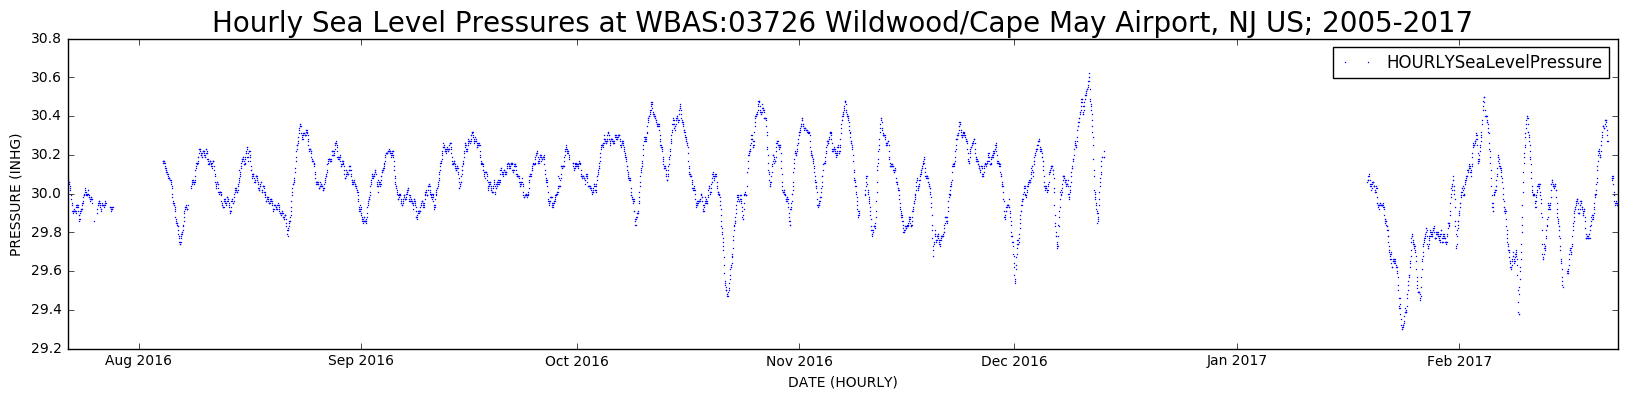

In [80]:
plt.figure(figsize=(20,4))
plt.title('Hourly Sea Level Pressures at WBAS:03726 Wildwood/Cape May Airport, NJ US; 2005-2017', size=20)
plt.plot(dataset.DATE, dataset.HOURLYSeaLevelPressure,'.', markersize=1)
plt.legend(loc='upper right')
plt.xlabel('DATE (HOURLY)')
plt.ylabel('PRESSURE (INHG)')
plt.show()

There is not a lot of sea level pressure data available from the airport. From 2005-2017, there is only data collected from less than a year that is also incomplete. I chose a point marker for this type of graph to highlight distinct data points because this graph has many peaks in a relatively short period of time.

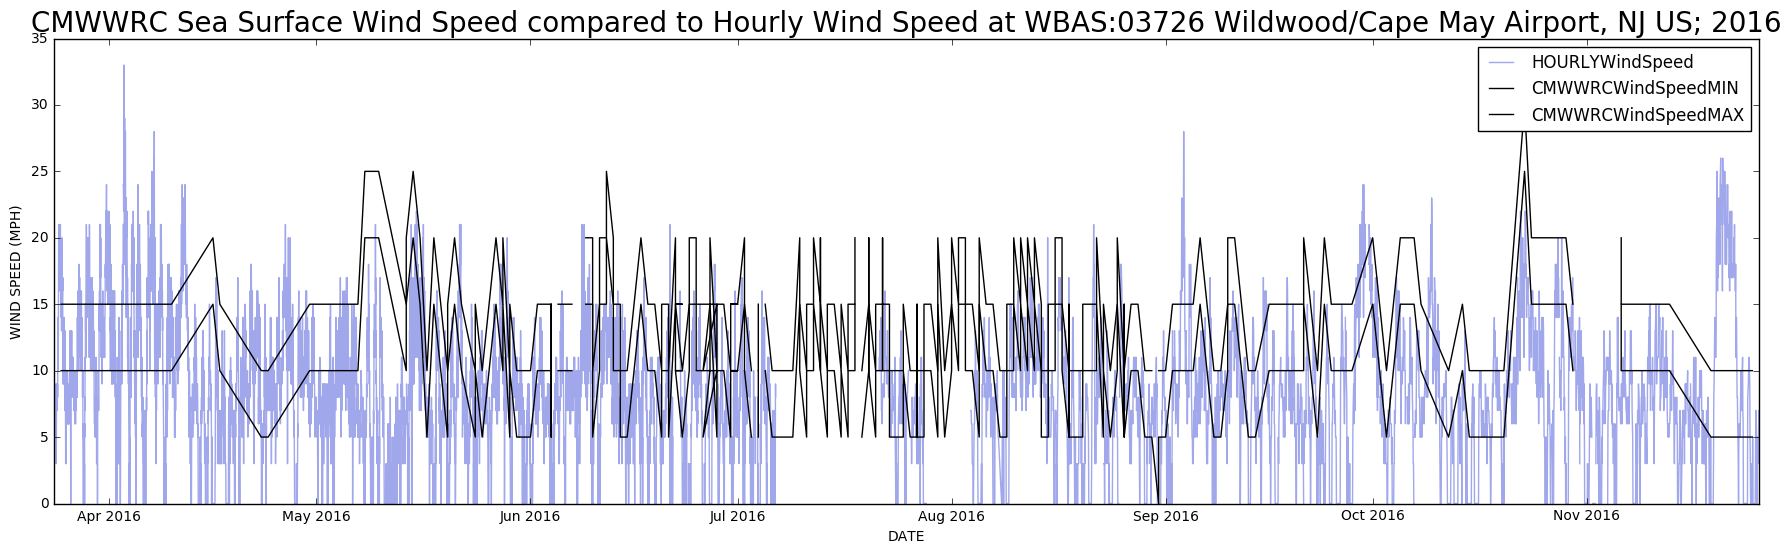

In [79]:
subset = dataset[
    (dataset.DATE > 'March 24, 2016')
    & 
    (dataset.DATE  < 'November 26, 2016')
]

plt.figure(figsize=(22,6))
plt.title('CMWWRC Sea Surface Wind Speed compared to Hourly Wind Speed at WBAS:03726 Wildwood/Cape May Airport, NJ US; 2016', size=20)
plt.plot(subset.DATE, subset.HOURLYWindSpeed,'-', c="#A0A7EB", markersize=1)
plt.plot(subset.DATE, subset.CMWWRCWindSpeedMIN, '-', c="#000000", markersize=10)
plt.plot(subset.DATE, subset.CMWWRCWindSpeedMAX, '-', c="#000000", markersize=10)
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

I thought this graph comparing sea surface observed wind speed and hourly wind speed observed by an inland station was overall consistent. I thought it was important to consider both the MIN and MAX wind speed observed by the whale watch as a range instead of an average because wind is variable through out the day and not consistent, and the windspeed from the airport is an hourly range and not an average. I created one marker color, a black overlay for the lighter colored station range.

Although the graph does seem a little cluttered, I thought readers would use the principle of perceptual organization to group the MIN and MAX range black lines together and look at the lighter colored line separately. Especially when looking at a smaller subset of the dataset.

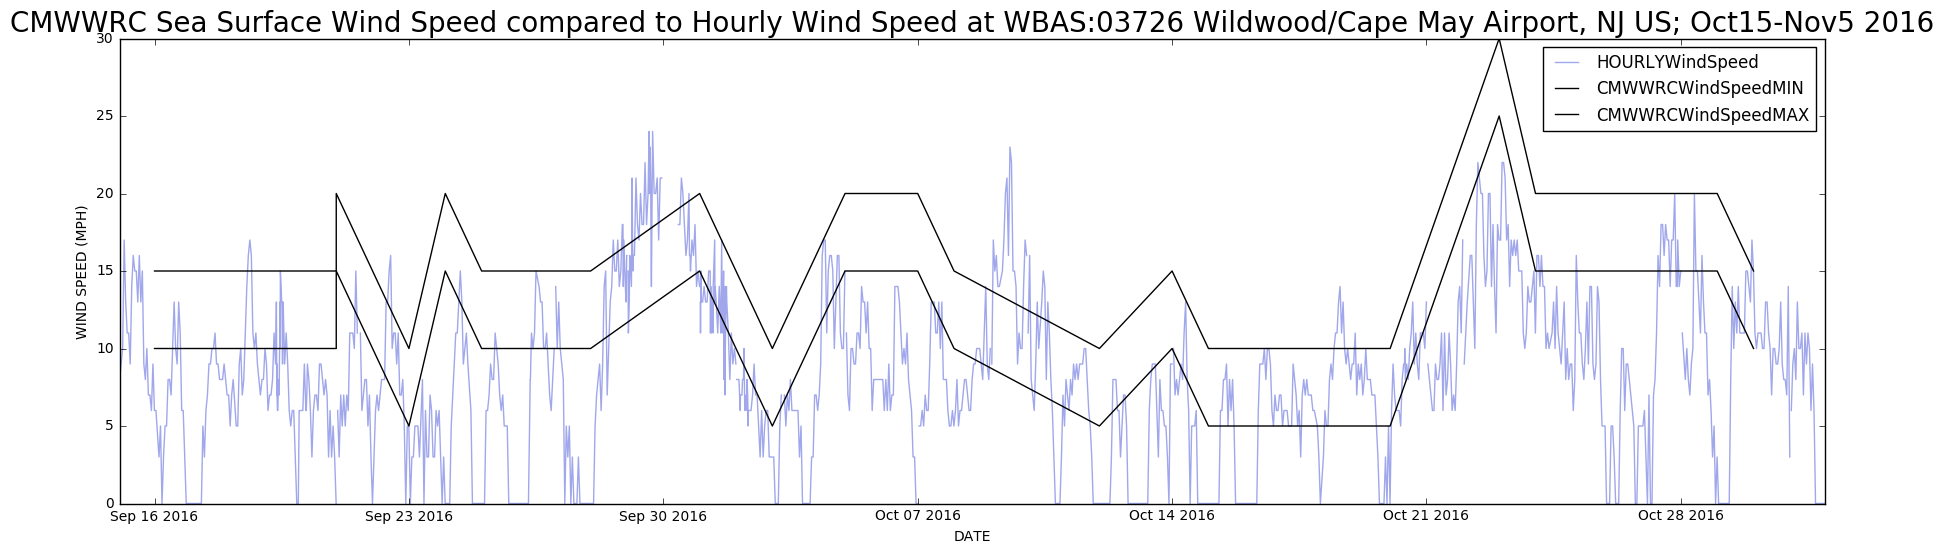

In [88]:
subset = dataset[
    (dataset.DATE > 'September 15, 2016')
    & 
    (dataset.DATE  < 'November 1, 2016')
]

plt.figure(figsize=(22,6))
plt.title('CMWWRC Sea Surface Wind Speed compared to Hourly Wind Speed at WBAS:03726 Wildwood/Cape May Airport, NJ US; Oct15-Nov5 2016', size=20)
plt.plot(subset.DATE, subset.HOURLYWindSpeed,'-', c="#A0A7EB", markersize=1)
plt.plot(subset.DATE, subset.CMWWRCWindSpeedMIN, '-', c="#000000", markersize=10)
plt.plot(subset.DATE, subset.CMWWRCWindSpeedMAX, '-', c="#000000", markersize=10)
plt.legend(loc='upper right')
plt.xlabel('DATE')
plt.ylabel('WIND SPEED (MPH)')
plt.show()

Without an in-depth analysis, this graph shows the sea surface observed wind speed follows a similar pattern to the peaks observed inland. Just like the sea surface temperature recordings, there are a few things to keep in mind when comparing wind speed:

-Since whale watch trips are variable and depend on many factors, it is possible wind blowing from certain directions may not be percieved accurately depending on location.

--A specific example is NE/SE winds: they create very large swells along the ocean which may prohibit travel in the ocean and limit access only to the Delaware Bay, where the wind may not be as severe due to the blocking from the land mass of the island.

<b>Some concepts I kept consistent through out all the graphs abiding by Tufte's and Kosslyn's principles were:</b>

-Making the large datasets coherent by looking at them as a whole and also as subsets.

-Labels on all X/Y axis, titles and legends are important.

-Keeping X/Y variables consistent and not incorporating data of different units on the same axis.

-I did not use any bar graphs because bar graphs are more for pointing out specific values, where these graphs were looking at trends. This falls under capacity limitations of Kosslyn's principles.

-Framework was consistent as mentioned by Kosslyn, with dates always occuring on X axis and other measured variable on Y axis.

-Appropriate knowledge was always taken into account and background information was provided as an explanation.

-Exact messages are displayed in the graph titles.